In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Creating path string
path = r'C:\Users\Alex Lam\Desktop\Career Foundary\Citi Bike Analysis'

In [3]:
#Importing datasets
df_citi_bike= pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citi bike prepared.csv'))

In [4]:
df_citi_bike.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

# Editing Data Further

In [5]:
df_citi_bike_clean = df_citi_bike.drop(columns = ['Unnamed: 0'])

In [6]:
df_citi_bike_clean.columns

Index(['day_of_week', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [7]:
df_citi_bike_clean[['end_date', 'end_hour']] = df_citi_bike_clean['end_time'].str.split(' ', expand=True)

In [8]:
df_citi_bike_clean['end_hour'] = df_citi_bike_clean['end_hour'].str[:-6]

In [9]:
df_citi_bike_clean.dtypes

day_of_week                 object
start_hour                   int64
start_time                  object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_time                    object
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
trip_duration                int64
subscriber                  object
birth_year                 float64
gender                      object
end_date                    object
end_hour                    object
dtype: object

In [10]:
#Creating a new variable which tells what hour the trip ended
df_citi_bike_clean['end_hour'] = df_citi_bike_clean['end_hour'].astype('int')

In [11]:
#Creating a new variable which is trip duration measured in mintues
df_citi_bike_clean['trip_duration_min'] = df_citi_bike_clean['trip_duration']/60

In [12]:
df_citi_bike_clean.head()

day_of_week  start_hour           start_time  start_station_id  \
0         Mon          18  2013-09-09 18:18:55               523   
1         Thu          18  2013-09-12 18:38:53               257   
2         Wed          19  2013-09-18 19:44:04               479   
3         Sat          11  2013-09-28 11:54:37               527   
4         Sat          18  2013-09-07 18:08:22               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

              end_time  end_station_id     end_station_name  \
0  2013-09-09 18:35:28             334      W 20 St & 7 Ave   
1  2013-09-12 18:48:34             236  St Marks Pl & 2 Ave   
2  2013-09-18 19:50:05             513     W 56 St & 10 Ave   
3  2013-09-28 12:03:58             441      E 52 St & 2 Ave   
4  2013-09-07 18:46:38             476      E 31 St & 3 Ave   

   end_station_latitude  end_station_longitude  trip_duration      subscriber  \
0             40.742388             -73.997262            993      Subscriber   
1             40.728419             -73.987140            581      Subscriber   
2             40.768254             -73.988639            361      Subscriber   
3             40.756014             -73.967416            561      Subscriber   
4             40.743943             -73.979661           2296  Non-Subscriber   

   birth_year gender    end_date  end_hour  trip_duration_min  
0      1968.0      F  2013-09-09        18          16.550000  
1      1983.0      M  2013-09-12        18           9.683333  
2      1989.0      M  2013-09-18        19           6.016667  
3      1988.0      F  2013-09-28        12           9.350000  
4         NaN    NaN  2013-09-07        18          38.266667

# Visualizations and Analysis

## Correlation

In [13]:
#Correlation matrix
df_citi_bike_clean.corr()

C:\Users\Alex Lam\AppData\Local\Temp\ipykernel_16128\3349103773.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_citi_bike_clean.corr()


start_hour  start_station_id  start_station_latitude  \
start_hour                 1.000000         -0.001270               -0.009121   
start_station_id          -0.001270          1.000000                0.106504   
start_station_latitude    -0.009121          0.106504                1.000000   
start_station_longitude   -0.045734          0.082925                0.211969   
end_station_id             0.004045          0.069007                0.059723   
end_station_latitude      -0.036941          0.061167                0.585463   
end_station_longitude      0.007160          0.025818                0.078218   
trip_duration              0.040870          0.061655               -0.025321   
birth_year                 0.064253         -0.005078               -0.045421   
end_hour                   0.956936          0.002011               -0.009386   
trip_duration_min          0.040870          0.061655               -0.025321   

                         start_station_longitude  end_station_id  \
start_hour                             -0.045734        0.004045   
start_station_id                        0.082925        0.069007   
start_station_latitude                  0.211969        0.059723   
start_station_longitude                 1.000000        0.024363   
end_station_id                          0.024363        1.000000   
end_station_latitude                    0.093074        0.107011   
end_station_longitude                   0.418376        0.088185   
trip_duration                          -0.007220        0.059549   
birth_year                              0.030340       -0.004666   
end_hour                               -0.044341        0.005492   
trip_duration_min                      -0.007220        0.059549   

                         end_station_latitude  end_station_longitude  \
start_hour                          -0.036941               0.007160   
start_station_id                     0.061167               0.025818   
start_station_latitude               0.585463               0.078218   
start_station_longitude              0.093074               0.418376   
end_station_id                       0.107011               0.088185   
end_station_latitude                 1.000000               0.200080   
end_station_longitude                0.200080               1.000000   
trip_duration                       -0.044033               0.001111   
birth_year                          -0.041876               0.040611   
end_hour                            -0.032916               0.006126   
trip_duration_min                   -0.044033               0.001111   

                         trip_duration  birth_year  end_hour  \
start_hour                    0.040870    0.064253  0.956936   
start_station_id              0.061655   -0.005078  0.002011   
start_station_latitude       -0.025321   -0.045421 -0.009386   
start_station_longitude      -0.007220    0.030340 -0.044341   
end_station_id                0.059549   -0.004666  0.005492   
end_station_latitude         -0.044033   -0.041876 -0.032916   
end_station_longitude         0.001111    0.040611  0.006126   
trip_duration                 1.000000   -0.047118  0.067726   
birth_year                   -0.047118    1.000000  0.058737   
end_hour                      0.067726    0.058737  1.000000   
trip_duration_min             1.000000   -0.047118  0.067726   

                         trip_duration_min  
start_hour                        0.040870  
start_station_id                  0.061655  
start_station_latitude           -0.025321  
start_station_longitude          -0.007220  
end_station_id                    0.059549  
end_station_latitude             -0.044033  
end_station_longitude             0.001111  
trip_duration                     1.000000  
birth_year                       -0.047118  
end_hour                          0.067726  
trip_duration_min                 1.000000

C:\Users\Alex Lam\AppData\Local\Temp\ipykernel_16128\2719695055.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_citi_bike_clean.corr(), annot = True).set(title='Citi Bike Correlation Graph')


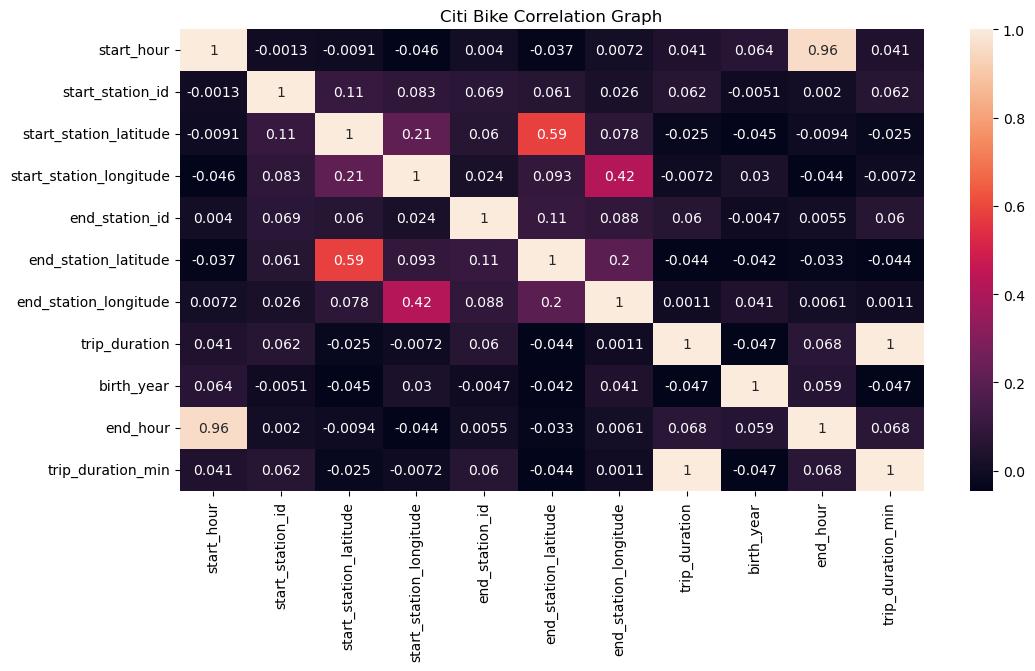

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(df_citi_bike_clean.corr(), annot = True).set(title='Citi Bike Correlation Graph')
plt.savefig(os.path.join(path, '04 Analysis', 'Citi Bike Correlation Graph.png'), bbox_inches='tight', dpi=1000)

## Scatterplots

Text(0, 0.5, 'End Hour')

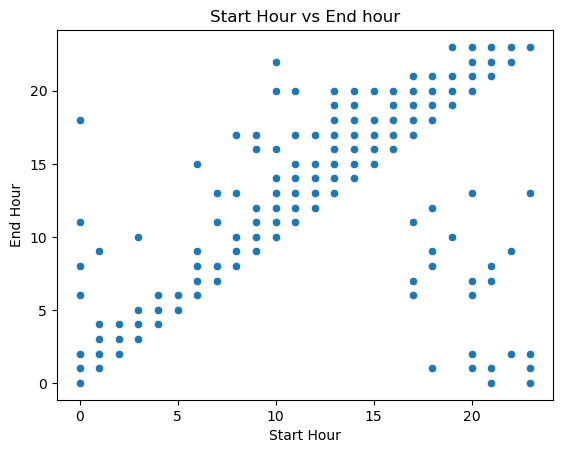

In [15]:
#Scatterplot start hour vs end hour
sns.scatterplot(x = 'start_hour', y = 'end_hour',data = df_citi_bike_clean)
plt.title('Start Hour vs End hour')
plt.xlabel('Start Hour')
plt.ylabel('End Hour')

January contains the most streams by a fair margin.

Text(0, 0.5, 'Trip Duration')

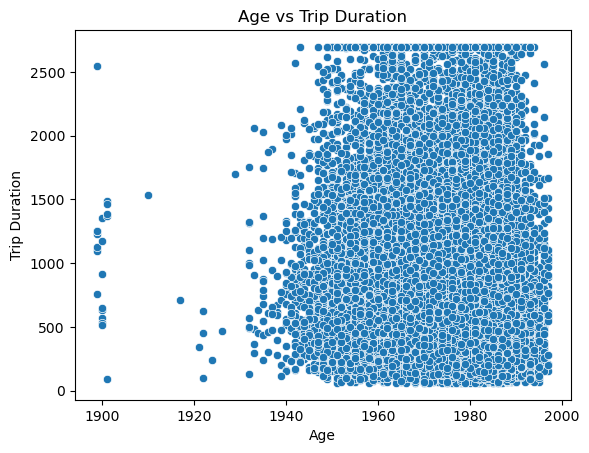

In [16]:
#Scatterplot birth year vs trip duration
sns.scatterplot(x = 'birth_year', y = 'trip_duration',data = df_citi_bike_clean)
plt.title('Age vs Trip Duration')
plt.xlabel('Age')
plt.ylabel('Trip Duration')

January has the highest streams per month.

In [17]:
#Dataframe which averages trip duration and organizes by users' birth year
average_trip_duration_per_birth_year = df_citi_bike_clean.groupby('birth_year').agg(average_trip_duration = ('trip_duration', 'mean'))

Text(0, 0.5, 'Average Trip Duration')

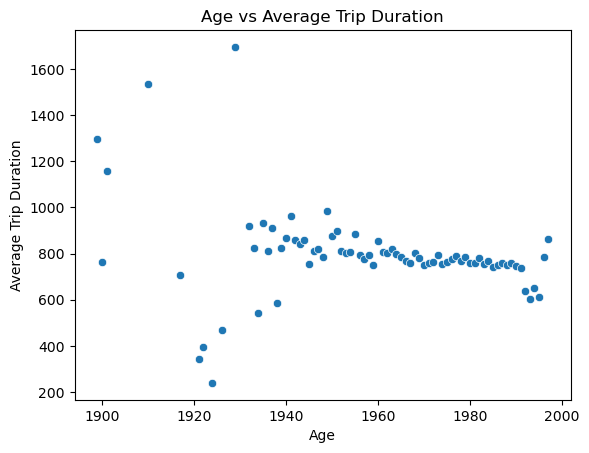

In [18]:
#Scatterplot average trip duration per birth year
sns.scatterplot(x = 'birth_year', y = 'average_trip_duration',data = average_trip_duration_per_birth_year)
plt.title('Age vs Average Trip Duration')
plt.xlabel('Age')
plt.ylabel('Average Trip Duration')

Text(0, 0.5, 'Trip Duration')

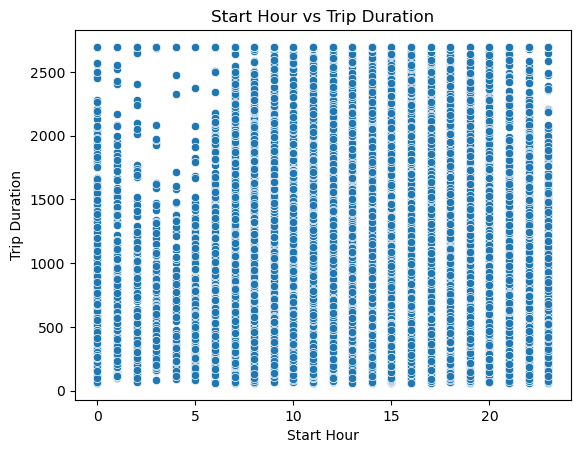

In [19]:
#Scatterplot average trip duration per birth year
sns.scatterplot(x = 'start_hour', y = 'trip_duration',data = df_citi_bike_clean)
plt.title('Start Hour vs Trip Duration')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration')

In [20]:
#Dataframe which averages trip duration and organizes by users' birth year
average_trip_duration_per_start_hour = df_citi_bike_clean.groupby('start_hour').agg(average_trip_duration = ('trip_duration', 'mean'))

In [21]:
average_trip_duration_per_start_hour

average_trip_duration
start_hour                       
0                      818.139847
1                      817.136364
2                      760.989691
3                      745.958333
4                      735.662921
5                      642.836538
6                      659.232711
7                      740.662261
8                      778.056334
9                      767.065813
10                     835.469529
11                     869.066755
12                     845.141724
13                     860.804297
14                     900.956044
15                     898.646532
16                     908.971511
17                     874.557199
18                     873.295422
19                     821.587950
20                     822.304801
21                     800.775391
22                     789.698413
23                     785.373391

Text(0, 0.5, 'Average Trip Duration')

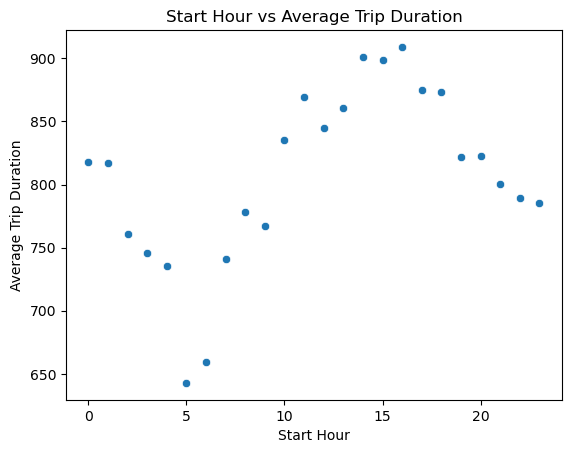

In [22]:
sns.scatterplot(x = 'start_hour', y = 'average_trip_duration',data = average_trip_duration_per_start_hour)
plt.title('Start Hour vs Average Trip Duration')
plt.xlabel('Start Hour')
plt.ylabel('Average Trip Duration')

## Pairplot

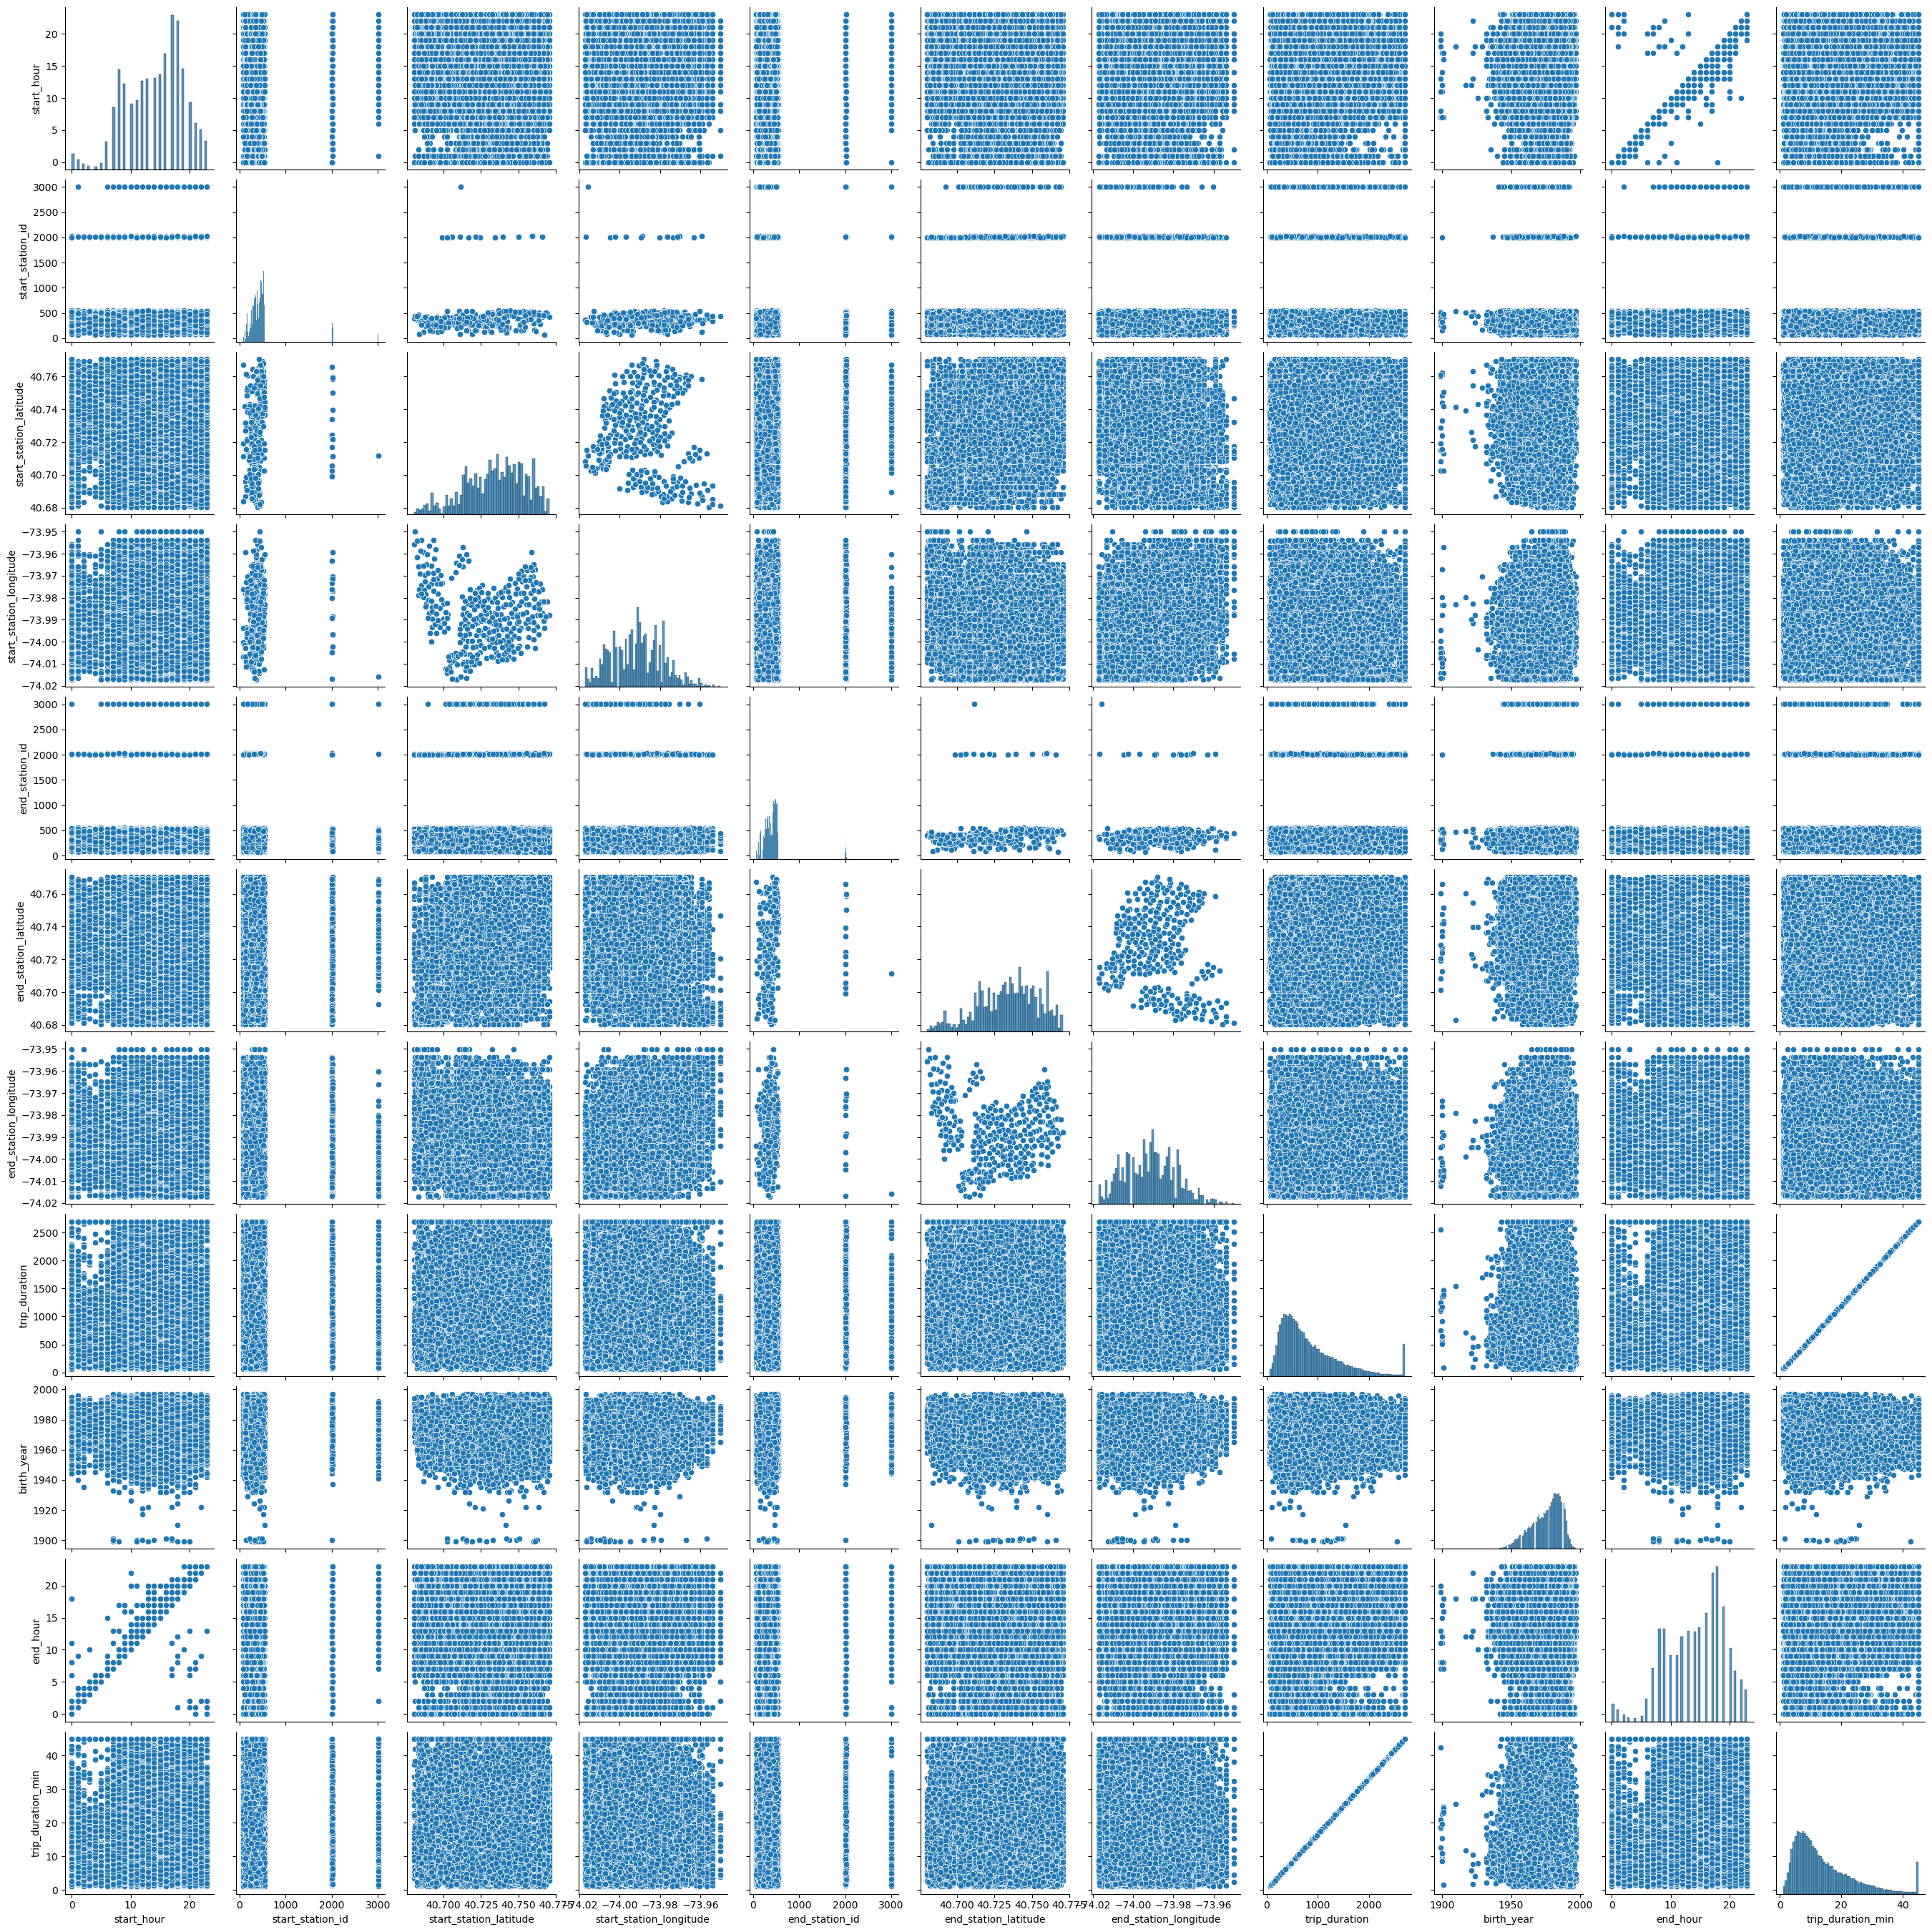

In [23]:
sns.pairplot(df_citi_bike_clean)

## Categorical Plots

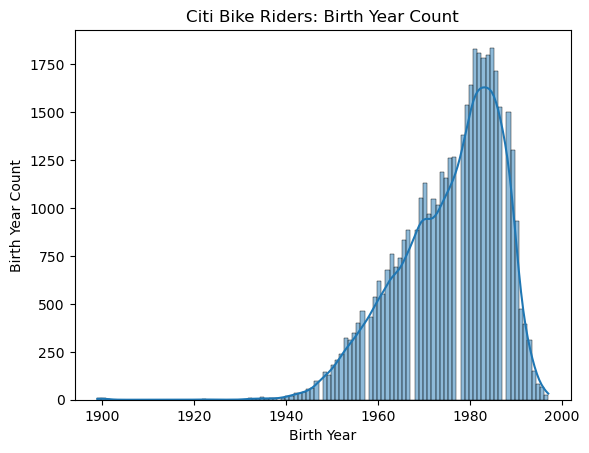

In [24]:
sns.histplot(df_citi_bike_clean['birth_year'], kde = True)
plt.title('Citi Bike Riders: Birth Year Count')
plt.xlabel('Birth Year')
plt.ylabel('Birth Year Count')
plt.savefig(os.path.join(path, '04 Analysis', 'Citi Bike Birth Year Count.png'), bbox_inches='tight', dpi=1000)

In [25]:
#Senior birth year is 1948 as 2013-1948 is 65, which is the senior citizen age
#Middle aged starts at 1973
#Any other age is considered the young age group

result = []

for value in df_citi_bike_clean['birth_year']:
  if value > 1973:
    result.append("Young")
  elif value <= 1948:
    result.append("Senior")
  else:
    result.append("Middle Aged")

In [26]:
df_citi_bike_clean['Age Group'] = result

In [27]:
df_citi_bike_clean['Age Group'].value_counts(dropna = False)

Young          26989
Middle Aged    22412
Senior           599
Name: Age Group, dtype: int64

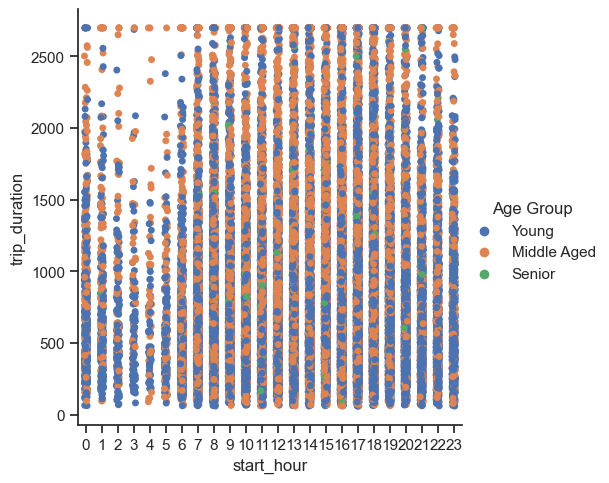

In [28]:
#Start hour vs Trip duration organized by age group
sns.set(style="ticks")
plot_stream_category = sns.catplot(x='start_hour', y='trip_duration', hue='Age Group', data = df_citi_bike_clean)

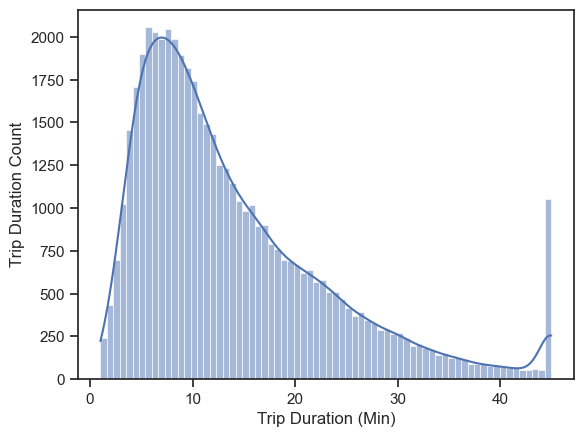

In [29]:
sns.histplot(df_citi_bike_clean['trip_duration_min'], kde = True)
plt.xlabel('Trip Duration (Min)')
plt.ylabel('Trip Duration Count')
plt.savefig(os.path.join(path, '04 Analysis', 'Citi Bike Trip Duration Count.png'), bbox_inches='tight', dpi=1000)

In [30]:
#For loop for creating new variable grouping trip duration
# 10 and less is a "Short" trip
# 30 and more is a "Long" trip
# Everything in between is a "Medium" trip

result = []

for value in df_citi_bike_clean['trip_duration_min']:
  if value <= 10:
    result.append("Short")
  elif value >= 30 :
    result.append("Long")
  else:
    result.append("Medium")

In [31]:
df_citi_bike_clean['Trip Duration Group'] = result

In [32]:
df_citi_bike_clean['Trip Duration Group'].value_counts(dropna = False)

Medium    24361
Short     21879
Long       3760
Name: Trip Duration Group, dtype: int64

In [33]:
#Day of the week lable was created so it can be measured on a scatterplot
df_citi_bike_clean['Day of the Week Label'] = df_citi_bike_clean['day_of_week']

In [34]:
df_citi_bike_clean['Day of the Week Label']  = df_citi_bike_clean['Day of the Week Label'].replace(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'],['1', '2', '3', '4', '5', '6', '7'])

In [35]:
df_citi_bike_clean['Day of the Week Label'] = df_citi_bike_clean['Day of the Week Label'].astype('int')

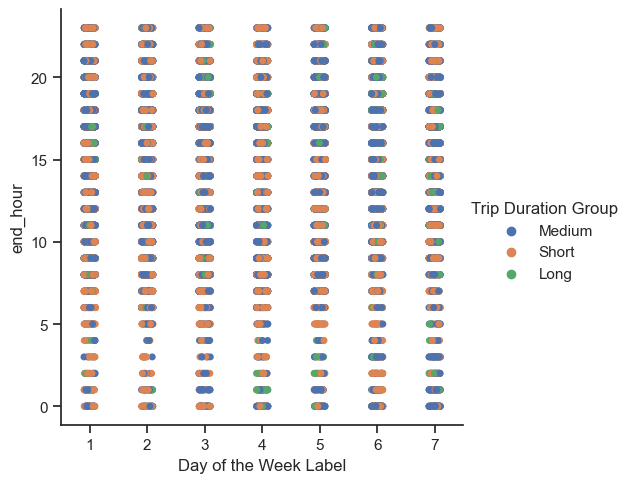

In [36]:
#Mon = 1, Tue = 2, Wed = 3, Thu = 4, Fri = 5, Sat = 6, Sun = 7
sns.set(style="ticks")
plot_stream_category = sns.catplot(x='Day of the Week Label', y='end_hour', hue='Trip Duration Group', data = df_citi_bike_clean)

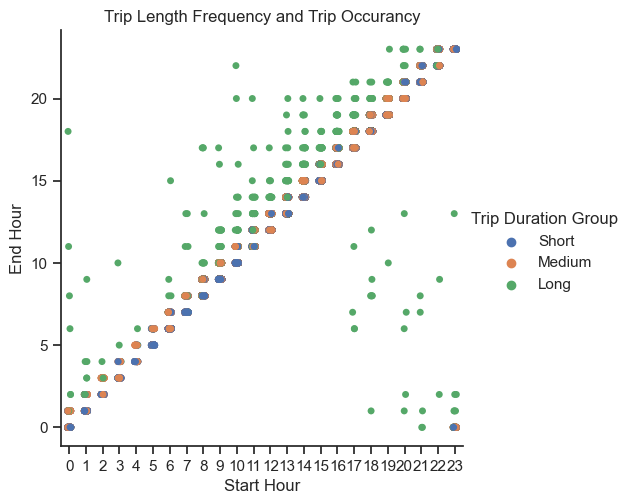

In [37]:
#Alternate version of previous scatterplot, but now organized with trip duration
sns.set(style="ticks")
plot_stream_category = sns.catplot(x='start_hour', y='end_hour', hue='Trip Duration Group', data = df_citi_bike_clean)
plt.title('Trip Length Frequency and Trip Occurancy')
plt.xlabel('Start Hour')
plt.ylabel('End Hour')
plt.savefig(os.path.join(path, '04 Analysis', 'Trip Length Frequency and Trip Occurancy.png'), bbox_inches='tight', dpi=1000)

## Other visualizations

In [38]:
#Creating a dataframe which total rides per day of week
rides_per_day = df_citi_bike_clean.groupby('day_of_week').agg(trip_count = ('start_hour', 'count'))

In [39]:
rides_per_day

trip_count
day_of_week            
Fri                7309
Mon                7715
Sat                6507
Sun                7319
Thu                6857
Tue                7065
Wed                7228

In [40]:
bar_rides_per_day = rides_per_day.sort_values('trip_count', ascending = False)

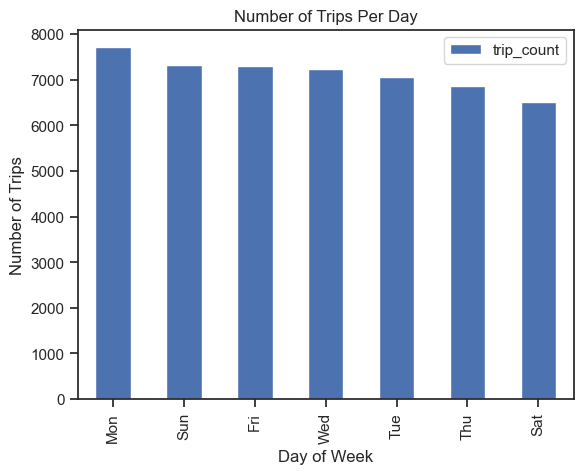

In [41]:
#Bar graph counting each trip per day in descending order
bar_rides_per_day.plot.bar()
plt.title('Number of Trips Per Day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.savefig(os.path.join(path, '04 Analysis', 'Citi Bike Trip Duration Count.png'), bbox_inches='tight', dpi=1000)

In [42]:
rides_per_day2 = df_citi_bike_clean.groupby('Day of the Week Label').agg(trip_count = ('start_hour', 'count'))

In [43]:
rides_per_day2

trip_count
Day of the Week Label            
1                            7715
2                            7065
3                            7228
4                            6857
5                            7309
6                            6507
7                            7319

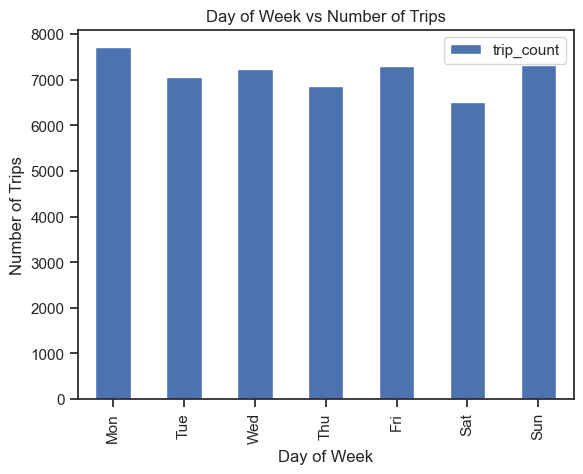

In [44]:
#Alternate version of bar graph counting each trip per day which is ordered per day of week
rides_per_day2.plot.bar()
x = 0, 1, 2, 3, 4, 5, 6
my_xticks = ['Mon','Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(x, my_xticks)
plt.title('Day of Week vs Number of Trips')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.savefig(os.path.join(path, '04 Analysis', 'Citi Bike Day of Week vs Number of Trips.png'), bbox_inches='tight', dpi=1000)

In [45]:
#Creating a dataframe which total rides per hour
rides_per_hour = df_citi_bike_clean.groupby('start_hour').agg(hour_count = ('start_hour', 'count'))

In [46]:
rides_per_hour

hour_count
start_hour            
0                  522
1                  330
2                  194
3                  120
4                   89
5                  208
6                  911
7                 2043
8                 3284
9                 2811
10                2166
11                2277
12                2900
13                2979
14                3003
15                3129
16                3791
17                5070
18                4871
19                3303
20                2208
21                1536
22                1323
23                 932

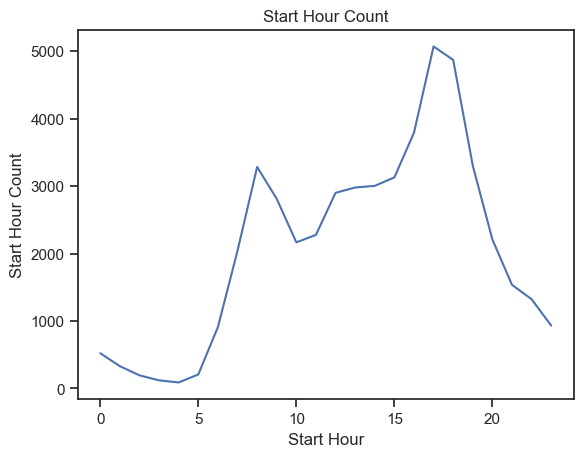

In [47]:
sns.lineplot(data = rides_per_hour, x = 'start_hour',y = 'hour_count').set(title='Start Hour Count')
plt.xlabel('Start Hour')
plt.ylabel('Start Hour Count')
plt.savefig(os.path.join(path, '04 Analysis', 'Start Hour Count.png'), bbox_inches='tight', dpi=1000)

In [48]:
rides_per_start_station_id = df_citi_bike_clean.groupby('start_station_id').agg(station_count = ('start_station_id', 'count'))

In [49]:
bar_rides_per_start_station_id = rides_per_start_station_id.head().sort_values(by = 'station_count', ascending = False)

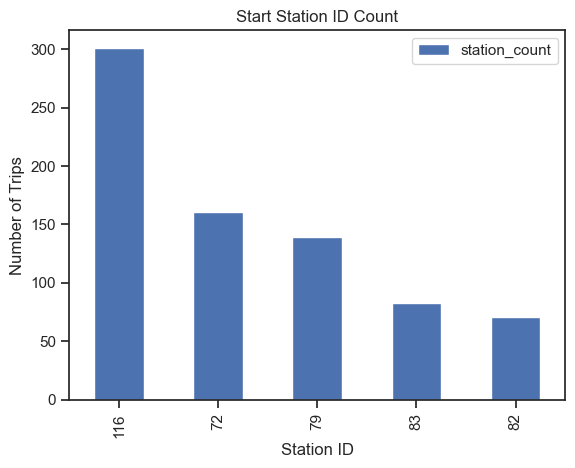

In [50]:
#Top starting station ID
bar_rides_per_start_station_id.plot.bar()
plt.title('Start Station ID Count')
plt.xlabel('Station ID')
plt.ylabel('Number of Trips')
plt.savefig(os.path.join(path, '04 Analysis', 'Start Station Count.png'), bbox_inches='tight', dpi=1000)

In [51]:
rides_per_end_station_id = df_citi_bike_clean.groupby('end_station_id').agg(station_count = ('end_station_id', 'count'))

In [52]:
bar_rides_per_end_station_id = rides_per_end_station_id.head().sort_values(by = 'station_count', ascending = False)

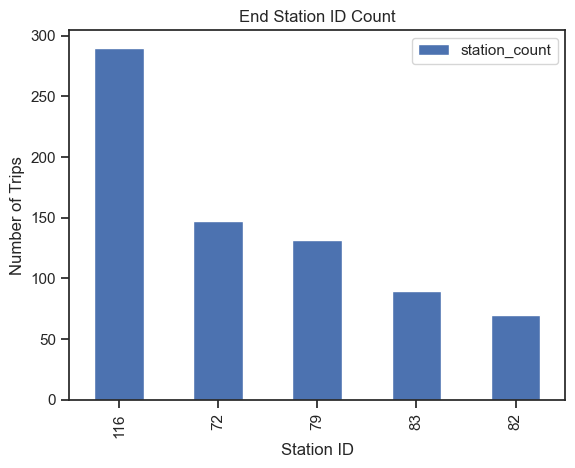

In [53]:
#Top end station ID
bar_rides_per_end_station_id.plot.bar()
plt.title('End Station ID Count')
plt.xlabel('Station ID')
plt.ylabel('Number of Trips')
plt.savefig(os.path.join(path, '04 Analysis', 'End Station Count.png'), bbox_inches='tight', dpi=1000)

In [54]:
df_citi_bike_clean_sub = df_citi_bike_clean.loc[df_citi_bike_clean['subscriber'].isin(['Subscriber'])]

In [55]:
#Statistics of subscribed users
df_citi_bike_clean_sub.describe()

start_hour  start_station_id  start_station_latitude  \
count  43021.000000      43021.000000            43021.000000   
mean      14.084563        437.226610               40.734477   
std        4.932676        340.831639                0.019598   
min        0.000000         72.000000               40.680342   
25%       10.000000        304.000000               40.721101   
50%       15.000000        402.000000               40.736245   
75%       18.000000        485.000000               40.749718   
max       23.000000       3002.000000               40.770513   

       start_station_longitude  end_station_id  end_station_latitude  \
count             43021.000000     43021.00000          43021.000000   
mean                -73.990952       434.59815             40.734069   
std                   0.012370       332.88413              0.019602   
min                 -74.017134        72.00000             40.680342   
25%                 -74.000040       305.00000             40.720828   
50%                 -73.990765       402.00000             40.735877   
75%                 -73.981948       483.00000             40.749013   
max                 -73.950048      3002.00000             40.770513   

       end_station_longitude  trip_duration    birth_year      end_hour  \
count           43021.000000    43021.00000  43021.000000  43021.000000   
mean              -73.991245      770.62337   1975.627786     14.226703   
std                 0.012375      523.46211     11.089001      4.976645   
min               -74.017134       60.00000   1899.000000      0.000000   
25%               -74.000271      395.00000   1968.000000     10.000000   
50%               -73.990985      621.00000   1978.000000     15.000000   
75%               -73.982578      999.00000   1984.000000     18.000000   
max               -73.950048     2697.00000   1997.000000     23.000000   

       trip_duration_min  Day of the Week Label  
count       43021.000000           43021.000000  
mean           12.843723               3.844216  
std             8.724368               1.978687  
min             1.000000               1.000000  
25%             6.583333               2.000000  
50%            10.350000               4.000000  
75%            16.650000               5.000000  
max            44.950000               7.000000

In [63]:
df_citi_bike_clean_sub_stats = df_citi_bike_clean_sub.drop(columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'Day of the Week Label'])

In [64]:
df_citi_bike_clean_sub_stats.describe()

start_hour    birth_year      end_hour  trip_duration_min
count  43021.000000  43021.000000  43021.000000       43021.000000
mean      14.084563   1975.627786     14.226703          12.843723
std        4.932676     11.089001      4.976645           8.724368
min        0.000000   1899.000000      0.000000           1.000000
25%       10.000000   1968.000000     10.000000           6.583333
50%       15.000000   1978.000000     15.000000          10.350000
75%       18.000000   1984.000000     18.000000          16.650000
max       23.000000   1997.000000     23.000000          44.950000

In [56]:
#Statistics for non-subscribed users
df_citi_bike_clean_non_sub = df_citi_bike_clean.loc[df_citi_bike_clean['subscriber'].isin(['Non-Subscriber'])]

In [57]:
df_citi_bike_clean_non_sub.describe()

start_hour  start_station_id  start_station_latitude  \
count  6979.000000       6979.000000             6979.000000   
mean     14.519272        480.892535               40.732276   
std       4.371541        439.472269                0.021644   
min       0.000000         72.000000               40.680342   
25%      12.000000        304.000000               40.715348   
50%      15.000000        402.000000               40.733143   
75%      17.000000        483.000000               40.750073   
max      23.000000       3002.000000               40.770513   

       start_station_longitude  end_station_id  end_station_latitude  \
count              6979.000000     6979.000000           6979.000000   
mean                -73.992077      491.494197             40.732565   
std                   0.013603      469.997915              0.021499   
min                 -74.017134       72.000000             40.680342   
25%                 -74.002950      301.000000             40.715348   
50%                 -73.991454      398.000000             40.733320   
75%                 -73.981923      484.000000             40.750073   
max                 -73.950048     3002.000000             40.770513   

       end_station_longitude  trip_duration  birth_year     end_hour  \
count            6979.000000    6979.000000         0.0  6979.000000   
mean              -73.992004    1260.374982         NaN    14.807852   
std                 0.013687     679.919213         NaN     4.440933   
min               -74.017134      60.000000         NaN     0.000000   
25%               -74.002950     737.000000         NaN    12.000000   
50%               -73.991475    1177.000000         NaN    15.000000   
75%               -73.981923    1630.000000         NaN    18.000000   
max               -73.950048    2697.000000         NaN    23.000000   

       trip_duration_min  Day of the Week Label  
count        6979.000000            6979.000000  
mean           21.006250               4.641782  
std            11.331987               2.134099  
min             1.000000               1.000000  
25%            12.283333               3.000000  
50%            19.616667               5.000000  
75%            27.166667               7.000000  
max            44.950000               7.000000

In [65]:
df_citi_bike_clean_non_sub_stats = df_citi_bike_clean_non_sub.drop(columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude', 'trip_duration', 'Day of the Week Label'])

In [66]:
df_citi_bike_clean_non_sub_stats.describe()

start_hour  birth_year     end_hour  trip_duration_min
count  6979.000000         0.0  6979.000000        6979.000000
mean     14.519272         NaN    14.807852          21.006250
std       4.371541         NaN     4.440933          11.331987
min       0.000000         NaN     0.000000           1.000000
25%      12.000000         NaN    12.000000          12.283333
50%      15.000000         NaN    15.000000          19.616667
75%      17.000000         NaN    18.000000          27.166667
max      23.000000         NaN    23.000000          44.950000

In [58]:
df_citi_bike_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'citi bike prepared 2.csv'))

# 7. Key Questions

What variable matters the most when people decide to ride a Citi Bike?

Time seems to be the biggest factor for when people decide when to ride a bike as there is a clear increase or decrease at different times. Other variables such as station ids or day of the week have closer to uniform values.

When is the busiest time for Citi Bike use?

6:00pm has the most rides.

What is the busiest day for Citi Bike?

Monday is the busiest day for Citi Bike.

What are the characteristics of an average Citi Bike user?

How long do people usually ride for? Do different scenarios change ride times?

Which stations are people leaving from and arriving at?

The top 5 start and end station IDs are: 116, 72, 79, 83, and 82. Futhermore the latitude and longitude for the start and end of the trips have a higher correlation to each other compared to the rest of the variables, which suggests many people are taking the same trips

How different are subscriber statistics vs non-subscriber statistics?

See stats chart above under the Other Visualizations section. It is noteworthy non-subscribers have a higher average trip time than subscribers.

# 8. Hypothesis

The most prevailing factor in whether or not a person uses a bike is the time of day. Marketing should try to make deals around unpopular times to encourage people to ride.